In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import torch 
from torchvision import transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader
from scipy.io import loadmat
from dataset import Data
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

torch.Size([251, 61])
torch.Size([251, 121])


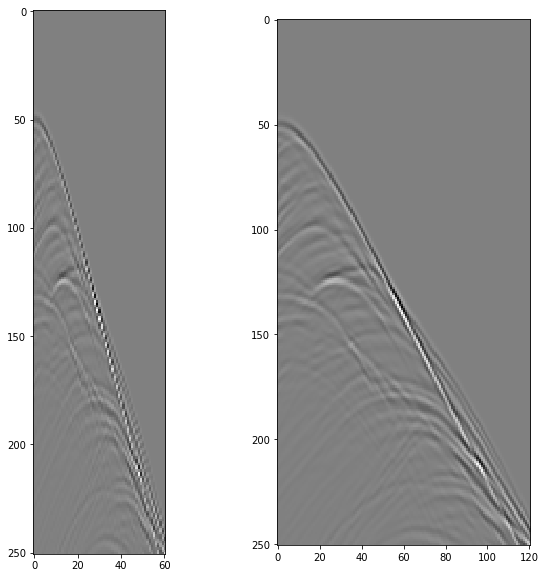

In [5]:
batch_size = 2

data = Data()
train_dataloader = DataLoader(data, batch_size = batch_size)
for batch in train_dataloader:
    print(batch['x'][0].shape)
    print(batch['y'][0].shape)
    plt.subplot(1, 2, 1)
    plt.imshow(batch['x'][0],cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(batch['y'][0],cmap='gray')
    plt.show()
    break

torch.Size([251, 61])
torch.Size([251, 121])


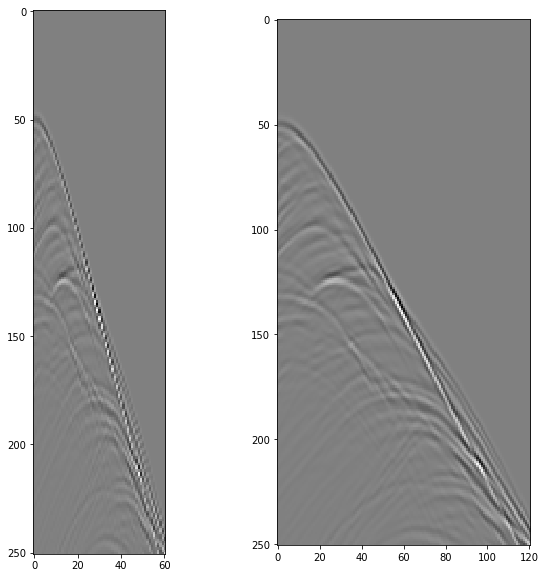

In [3]:

#overview of different models
# model described here http://personal.ie.cuhk.edu.hk/~ccloy/files/eccv_2014_deepresolution.pdf
class SRCNN(nn.Module):
    def __init__(self, latent_dim, input_dim = [251,61] , output_dim = [251,121] ):
        super(SRCNN, self).__init__()
        self.sequence = nn.Sequential()
        #actually dimensions have to be changed, here's a tutorial http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html
        self.sequence.add_module("Convolution 1", nn.Conv2d(1, 64, kernel_size = 9, padding = 4))
        self.sequence.add_module("ReLU 1", nn.ReLU()
        self.sequence.add_module("Convolution 2", nn.Conv2d(64, 32, kernel_size = 1 , padding = 0))
        self.sequence.add_module("ReLU 2", nn.ReLU()
        self.sequence.add_module("Convolution 3", nn.Conv2d(32, 1, kernel_size = 5 , padding = 2))
        
    
    def forward(self, x):
        return self.sequence(x)


